In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import decimal
import random
import os
import cv2
import itertools


from math import e
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD


## Question 1

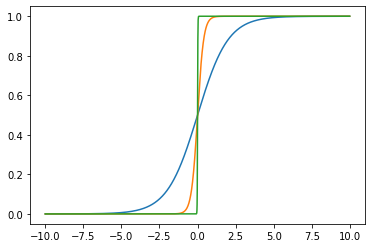

In [2]:
x = []
y1 = [] #w = 1 
y2 = [] # w = 5
y3 = [] # w =100

for i in range (-1000,1000,1): # in range (-10,10,0.01)
    x.append(i/100)
    y1.append(1/(1+e**(-1*i/100)))
    y2.append(1/(1+e**(-5*(i/100))))
    y3.append(1/(1+e**(-50*(i/100))* e**(-50*(i/100))))
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)


Η μπλέ καμπύλη αναπαριστά την sigmoid function με w = 1 \
Η πορτοκαλί καμπύλη αναπαριστά την sigmoid function με w = 5 \
Η πράσινη καμπύλη αναπαριστά την sigmoid function με w = 100 

Αυτό που παρατηρούμε είναι ότι όσο μεγαλώνει η τιμή του w τόσο πιο "απόλυτα" και "απότομα" γίνεται ο διαχωρισμός των σημείων πριν και μετά το 0 ο διαχωρισμός των χ σε κατηγορίες 0 και 1, ουσιαστικά μετά το σημείο x = 0 η συνάρτηση κάνει γρήγορα overfit.


Καθώς πολύ απότομα η sigmoid συνάρτηση στη περίπτωση καταλήγει να είναι overfitted στο μοντέλο, το ridge regression θα είναι πολύ πιο αποτελεσματικό από το lasso regression, καθώς η πρώτη κανονικοποίηση "τιμωρεί" περισσότερο πιο υψηλές τιμές στο w.

ridge regression:
$$ \sum^N_{i=1} (y - y')^2 + λ||w||^2_2$$

lasso regression:
$$ \sum^N_{i=1} (y - y')^2 + λ||w||_2$$

με y' οι προβλέψεις του μοντέλου

# Question 2

$$ β^* = argmin_β \sum^N_i (y_i - β^Tx_i)^2 + λ\sum^Κ_{κ=1} β^2_κ$$
Η παράσταση αυτή εκφρασμένη με ευκλείδιες νόρμες είναι:
$$ β^* = argmin_β ||y - xβ||^2  + λ||β||^2 $$
Αυτό με πράξεις πινάκων εκφράζεται:
$$ β^* = argmin_β (y - xβ)^Τ(y - xβ)  + λβ^Τβ $$
Αν παραγωγίσουμε ως προς β παίρνουμε:
$$\triangledown β^* = -2x(y - β) + 2λβ $$
Τώρα βρίσκουμε που μηδενίζεται η παραγωγος οπότε:
$$ -2x^T(y - xβ) + 2λβ = 0$$
$$ x^T(y - xβ) + λβ = 0 $$
$$ x^Ty - x^Txβ + Iλβ = 0$$
$$ (Iλ+x^Tx)β = -x^Ty$$

Συχεχίζοντας θα υποθέσουμε ότι λ>0

Ο πίνακας $Iλ+x^Tx$ είναι θετικά οριστικός πίνακας καθώς για διάνυσμα κ με διαστάσεις r x 1, με το k να είναι διάφορο του μηδενικού διανύσματος έχουμε:

$$ k^T(Iλ+x^Tx)k = (xk)^Txk +λk^Tk = \sum^N_{i=1} (x_ik)^2 +λ\sum^r_{j=1}(a_j)^2 > 0$$

η οποία ανισότητα αυτή ισχύει καθώς το διάνυσμα r έχει ένα μη μηδενικό στοχείο τουλάχιστον, οπότε ο πίνακας είναι αντιστρέψιμος, έτσι:

$$β = -x^Ty(Iλ+x^Tx)^{-1}$$

Για να δείξουμε ότι έχουμε ολικό ελάχιστο, δεδομένου το λ>0, η δεύτερη παράγωγος είναι:

$$ \triangledown^2 β^* = 2(X^TX+Iλ)$$
κάτι το οποίο είναι σίγουρα θετικό οπότε η ridge reggression είναι μία κυρτή συνάρτηση και άρα παρουσιάζει ολικό ελάχιστο στο σημείο που η πρώτη παράγωγος μηδενίζεται.



# Question 3

## Part 1

In [3]:
path = "..//input//q3faces//faces"

# λόγο της υλοποίησης στο kaggle δεν χρειάζεται να γίνει mount το google drive, βάζοντας όμως το σωστό μονοπάτι
# και έχοντας αποσυμπιέσει το αρχείο faces ο κώδικας θα δουλεύει

dir = os.scandir(path)

TempSet1 = []
y1 = []
TempSet2 = []
y2 = []
TempSet3 = []
y3 = []
TempSet4 = []
y4 = []
TempSet5 = []
y5 = []

for file in dir:
    tocheck = file.name
    #tocheck = tocheck[6:-4]
    imageFileName = path + "//" + file.name
    image_to_add = cv2.imread(imageFileName,0)
    in_which_set = float(tocheck[9:-4])
    person = float(tocheck[6:-7])
    #print(image_to_add)
    if in_which_set < 8 :
        fix_image = [x for img in image_to_add.reshape(2500,1) for x in img]
        TempSet1.append(fix_image)
        y1.append(person)
    elif in_which_set < 20 :
        fix_image = [x for img in image_to_add.reshape(2500,1) for x in img]
        TempSet2.append(fix_image)
        y2.append(person)
    elif in_which_set < 32 :
        fix_image = [x for img in image_to_add.reshape(2500,1) for x in img]
        TempSet3.append(fix_image)
        y3.append(person)
    elif in_which_set < 46 :
        fix_image = [x for img in image_to_add.reshape(2500,1) for x in img]
        TempSet4.append(fix_image)
        y4.append(person)
    else:
        fix_image = [x for img in image_to_add.reshape(2500,1) for x in img]
        TempSet5.append(fix_image)
        y5.append(person)
        
Set1 = np.array(TempSet1)
Set2 = np.array(TempSet2)
Set3 = np.array(TempSet3)
Set4 = np.array(TempSet4)
Set5 = np.array(TempSet5)



## Part 2

In [4]:

pca_d9 = PCA(n_components=9)
pca_d30 = PCA(n_components=30)


Set1_mean = Set1 - Set1.mean(axis = 0,keepdims=True)
Set2_mean = Set2 - Set2.mean(axis = 0,keepdims=True)
Set3_mean = Set3 - Set3.mean(axis = 0,keepdims=True)
Set4_mean = Set4 - Set4.mean(axis = 0,keepdims=True)
Set5_mean = Set5 - Set5.mean(axis = 0,keepdims=True)


scaler = Normalizer()

Set1_normalized = scaler.transform(Set1)
Set2_normalized = scaler.transform(Set2)
Set3_normalized = scaler.transform(Set3)
Set4_normalized = scaler.transform(Set4)
Set5_normalized = scaler.transform(Set5)



ReducedSet1_d9 = Set1_normalized
ReducedSet2_d9 = Set2_normalized
ReducedSet3_d9 = Set3_normalized
ReducedSet4_d9 = Set4_normalized
ReducedSet5_d9 = Set5_normalized


ReducedSet1_d30 = Set1_normalized
ReducedSet2_d30 = Set2_normalized
ReducedSet3_d30 = Set3_normalized
ReducedSet4_d30 = Set4_normalized
ReducedSet5_d30 = Set5_normalized

ReducedSet1_d9 = pca_d9.fit_transform(Set1_normalized)
ReducedSet2_d9 = pca_d9.transform(Set2_normalized)
ReducedSet3_d9 = pca_d9.transform(Set3_normalized)
ReducedSet4_d9 = pca_d9.transform(Set4_normalized)
ReducedSet5_d9 = pca_d9.transform(Set5_normalized)

ReducedSet1_d30 = pca_d30.fit_transform(Set1_normalized)
ReducedSet2_d30 = pca_d30.transform(Set2_normalized)
ReducedSet3_d30 = pca_d30.transform(Set3_normalized)
ReducedSet4_d30 = pca_d30.transform(Set4_normalized)
ReducedSet5_d30 = pca_d30.transform(Set5_normalized)



nn_d9 = KNeighborsClassifier(n_neighbors=1)
nn_d30 = KNeighborsClassifier(n_neighbors=1)

nn_d9.fit(ReducedSet1_d9,y1)

print("Accuracy for pca_d9")
print(nn_d9.score(ReducedSet1_d9,y1))
print(nn_d9.score(ReducedSet2_d9,y2))
print(nn_d9.score(ReducedSet3_d9,y3))
print(nn_d9.score(ReducedSet4_d9,y4))
print(nn_d9.score(ReducedSet5_d9,y5))

nn_d30.fit(ReducedSet1_d30,y1)

print("")
print("Accuracy for pca_d30")
print(nn_d30.score(ReducedSet1_d30,y1))
print(nn_d30.score(ReducedSet2_d30,y2))
print(nn_d30.score(ReducedSet3_d30,y3))
print(nn_d30.score(ReducedSet4_d30,y4))
print(nn_d30.score(ReducedSet5_d30,y5))


    


Accuracy for pca_d9
1.0
1.0
0.7916666666666666
0.35
0.16842105263157894

Accuracy for pca_d30
1.0
1.0
0.9166666666666666
0.45714285714285713
0.24210526315789474


Η ταξινόμηση παρουσιάζει μία κακή συμπεριφορά στα Set4 και Set5.
Έγιναν διάφορες δοκιμές κανονικοποιήσεων που δεν απέδωσαν καλύτερα (Φαίνονται στα import στο αρχικό κομμάτι του notebook) .

Δεν κάνουμε center τα δεδομένα καθώς η pca της sklearn το πραγματοποιεί μέσα στη συνάρτηση

## Part 3

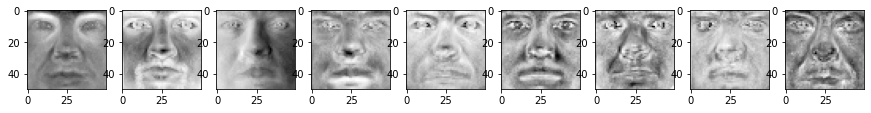

In [5]:
# plt.imshow(pca_d9.components_[1].reshape(50,50))
plt.figure(figsize=(15,15))
for x in range(0,pca_d9.components_.shape[0]):
    plt.subplot(1,pca_d9.components_.shape[0],x+1)   
    plt.imshow(pca_d9.components_[x].reshape(50,50),'Greys')
    


### Διαλέγουμε τυχαία μία εικόνα από κάθε σετ

In [6]:
random.seed(170156)


Set1pic = random.randint(0,Set1.shape[0])
Set2pic = random.randint(0,Set2.shape[0])
Set3pic = random.randint(0,Set3.shape[0])
Set4pic = random.randint(0,Set4.shape[0])
Set5pic = random.randint(0,Set5.shape[0])

# print(Set4pic)
# Set5pic

### Ώρα να συγκρίνουμε τις εικόνες!

### Set 1

#### d==9

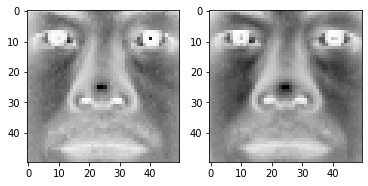

In [7]:
plt.subplot(1,2,1)
plt.imshow(Set1[Set1pic].reshape(50,50),'Greys')
plt.subplot(1,2,2)
plt.imshow(pca_d9.inverse_transform(ReducedSet1_d9)[Set1pic].reshape(50,50),'Greys')


#### d==30

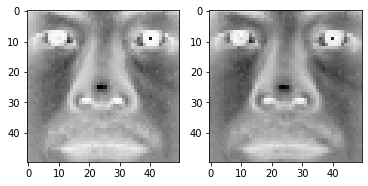

In [8]:
plt.subplot(1,2,1)
plt.imshow(Set1[Set1pic].reshape(50,50),'Greys')
plt.subplot(1,2,2)
plt.imshow(pca_d30.inverse_transform(ReducedSet1_d30)[Set1pic].reshape(50,50),'Greys')

### Set 2

d == 9

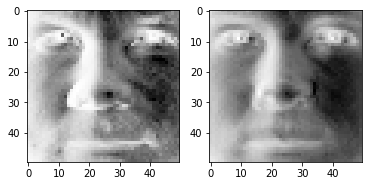

In [9]:
plt.subplot(1,2,1)
plt.imshow(Set2[Set2pic].reshape(50,50),'Greys')
plt.subplot(1,2,2)
plt.imshow(pca_d9.inverse_transform(ReducedSet2_d9)[Set2pic].reshape(50,50),'Greys')

d == 30

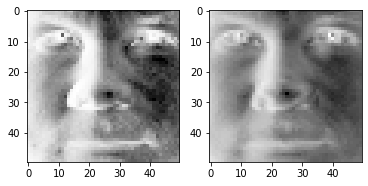

In [10]:
plt.subplot(1,2,1)
plt.imshow(Set2[Set2pic].reshape(50,50),'Greys')
plt.subplot(1,2,2)
plt.imshow(pca_d30.inverse_transform(ReducedSet2_d30)[Set2pic].reshape(50,50),'Greys')

### Set 3

d == 9

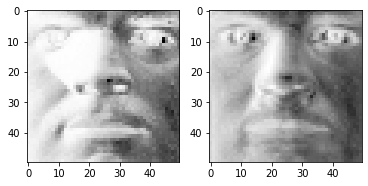

In [11]:
plt.subplot(1,2,1)
plt.imshow(Set3[Set3pic].reshape(50,50),'Greys')
plt.subplot(1,2,2)
plt.imshow(pca_d9.inverse_transform(ReducedSet3_d9)[Set3pic].reshape(50,50),'Greys')

d == 30 

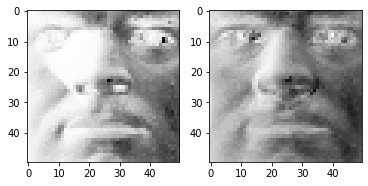

In [12]:
plt.subplot(1,2,1)
plt.imshow(Set3[Set3pic].reshape(50,50),'Greys')
plt.subplot(1,2,2)
plt.imshow(pca_d30.inverse_transform(ReducedSet3_d30)[Set3pic].reshape(50,50),'Greys')

### Set 4

d == 9

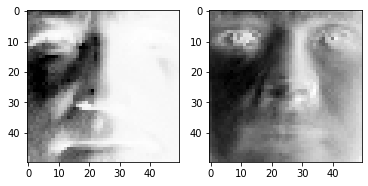

In [13]:
plt.subplot(1,2,1)
plt.imshow(Set4[Set4pic].reshape(50,50),'Greys')
plt.subplot(1,2,2)
plt.imshow(pca_d9.inverse_transform(ReducedSet4_d9)[Set4pic].reshape(50,50),'Greys')

d == 30

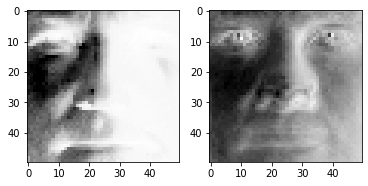

In [14]:
plt.subplot(1,2,1)
plt.imshow(Set4[Set4pic].reshape(50,50),'Greys')
plt.subplot(1,2,2)
plt.imshow(pca_d30.inverse_transform(ReducedSet4_d30)[Set4pic].reshape(50,50),'Greys')

### Set 5

d == 9

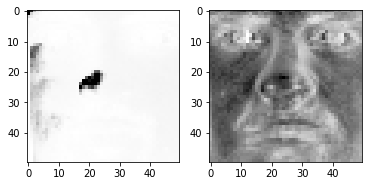

In [15]:
plt.subplot(1,2,1)
plt.imshow(Set5[Set5pic].reshape(50,50),'Greys')
plt.subplot(1,2,2)
plt.imshow(pca_d9.inverse_transform(ReducedSet5_d9)[Set5pic].reshape(50,50),'Greys')

d == 30 

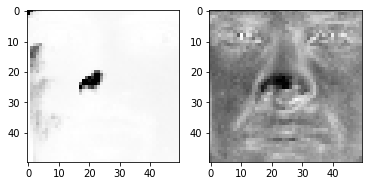

In [16]:
plt.subplot(1,2,1)
plt.imshow(Set5[Set5pic].reshape(50,50),'Greys')
plt.subplot(1,2,2)
plt.imshow(pca_d30.inverse_transform(ReducedSet5_d30)[Set5pic].reshape(50,50),'Greys')

Η ποίοτητα ανακατασκεύης σε κάθε εικόνα είναι η αναμενόμενη.
Για d = 9 έχουμε μία αρκετά καλή αναπαράσταση σε σχέση με την αρχική εικόνα.
Για d = 30 έχουμε μία ακόμη καλύτερη αναπαράσταση από την d = 9 και κοντινότερη προσέγγιση της αρχικής εικόνας.
Ειδικά στην εικόνα από το Set5 παρατηρούμε την αύξηση της "φωτεινότητας" για d = 30.

## Part 5

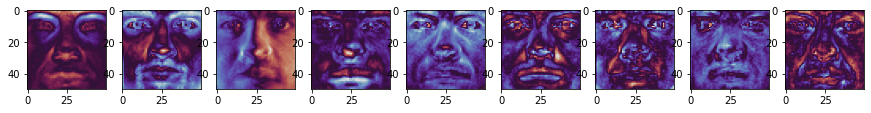

In [17]:
TSVD_d9 = TruncatedSVD(n_components = 9)

SVDReducedSet1 = TSVD_d9.fit_transform(Set1_mean)


plt.figure(figsize=(15,15))
for x in range(0,pca_d9.components_.shape[0]):
    plt.subplot(1,pca_d9.components_.shape[0],x+1)   
    plt.imshow(pca_d9.components_[x].reshape(50,50),'twilight')
    


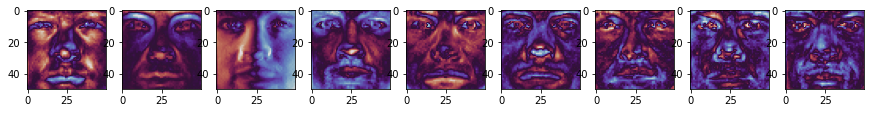

In [18]:

plt.figure(figsize=(15,15))
for x in range(0,TSVD_d9.components_.shape[0]):
    plt.subplot(2,TSVD_d9.components_.shape[0],x+1)   
    plt.imshow(TSVD_d9.components_[x].reshape(50,50),'twilight' )

    

Παρατηρούμε ότι τα τα 9 κύρια singular vectors που προκύπτουν αφού εφαρμόσουμε SVD
στον πίνακα δεδομένων του Set 1 έχουν διαφορά από τα πρώτα 9 ιδιοδιανύσματα της PCA, αλλά είναι αρκετά όμοια.

Παρατηρούμε ότι τα τα 9 κύρια singular vectors που προκύπτουν αφού εφαρμόσουμε SVD
στον πίνακα δεδομένων του Set 1 δεν έχουν διαφορά από τα πρώτα 9 ιδιοδιανύσματα της PCA.
Εάν δεν είχαμε κάνει τη κανονικοποίηση με την sklearn.Normalizer θα είχαμε τα ίδια ιδιοδιανύσματα.

Θα το αποδείξουμε:

Έστω ότι τα δεδομένα αναπαριστόνται από έναν πίνακα X m δειγμάτων επί n μεταβλητών. \\
Επίσης υποθέτουμε (που στη περίπτωση μας συμβαίνει λόγω της υλοποίησης της PCA που χρησιμοποιείται) ότι από τις στήλες των δεδομένων έχουν αφαιρεθεί σε κάθε μία ο μέσος όρος της αντίστοιχης στήλης.
Ο πίνακας συνδιακυμανσης C δίνεται από τον τύπο $C = (1/m-1)X^T X $.
Ο πίνακας C είναι συμμετρικός αλλά και διαγωνοποιήσημος.
Οπότε $C = VK V^T$ ,
όπου V πίνακας ιδιοδιανυσμάτων και K διαγώνιος πίνακας ιδιοτιμών σε φθίνουσα σειρά.
Η PCA ουσιαστικά κάνει μία αναπαράσταση XV με V ιδιοδιανύσματα της $Χ^Τ Χ$ (που τελικά είναι της X).
Αν κάνουμε SVD στον X έχουμε ότι $$X = USV^T$$
με U να είναι ένας πίνακας όπου ο ανάστροφος του είναι και αντίστροφός του και ο S είναι ένας διαγώνιος πίνακας. Έτσι:

$C=VSU^TUSV^T/(m−1)=V\frac{S^2}{n−1}V^T$

συνεπώς τα singular vectors της SVD είναι ίδια με τα ιδιοδιανύσματα της PCA εφόσον έχει γίνει μόνο κανονικοποίηση όπου κεντρίσουμε τα δεδομένα γύρω από το (0,0) 
